In [ ]:
#Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

In [ ]:
#import the dataset 
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [ ]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_set['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

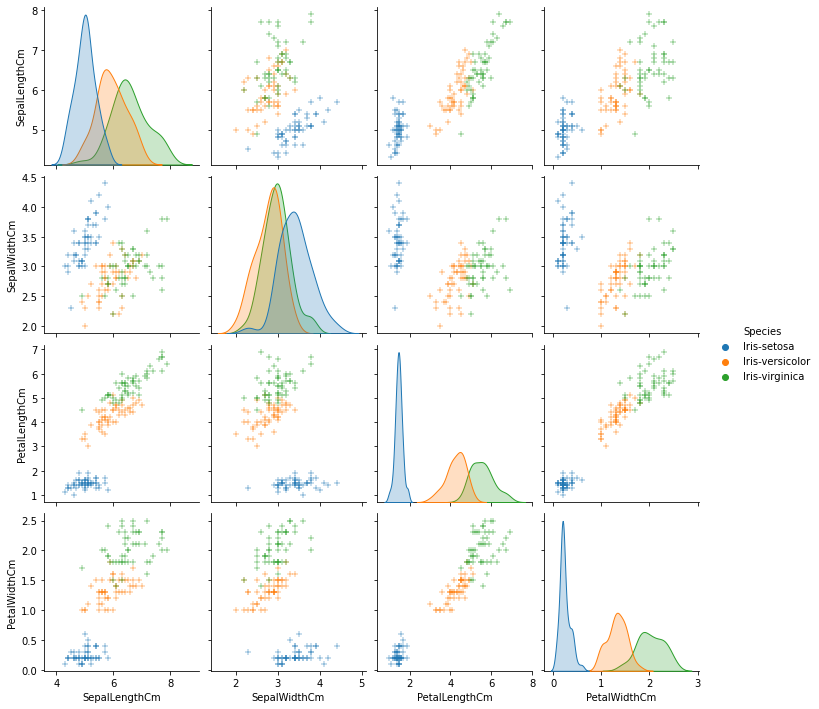

In [ ]:
tmp = data_set.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

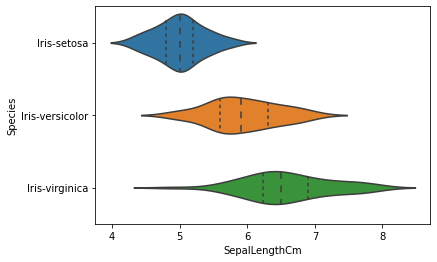

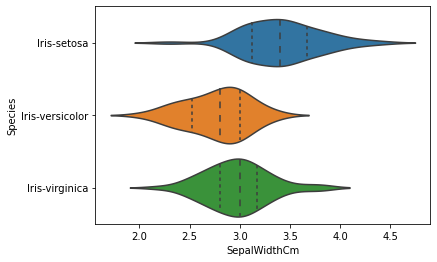

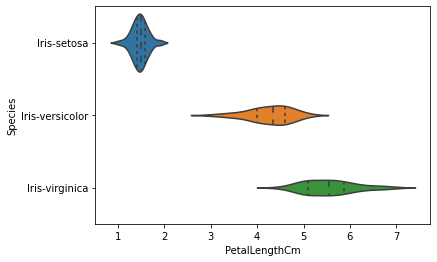

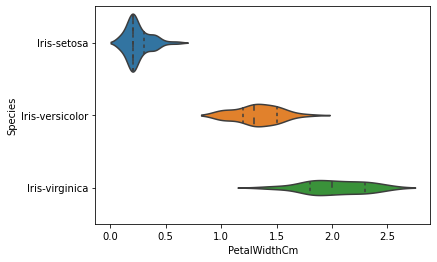

In [ ]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data_set, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data_set, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data_set, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data_set, inner='quartile')
plt.show()

In [ ]:
Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]


In [ ]:
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


In [ ]:
# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ### 4 predictors
        self.fc2 = nn.Linear(227, 94) ### 227 neurons in hidden layer 1, 94 in 3
        self.fc3 = nn.Linear(94, 75) ### 75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

from torch.autograd import Variable

In [ ]:
loss1 = []
train_acc = []

Epoch = 1000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 1000, i+1, loss.data, train_acc1))

Epoch [1/1000], Iter [1] Loss: 1.0966 Training Accuracy: 0.33333
Epoch [2/1000], Iter [1] Loss: 1.0918 Training Accuracy: 0.37778
Epoch [3/1000], Iter [1] Loss: 1.0904 Training Accuracy: 0.39259
Epoch [4/1000], Iter [1] Loss: 1.0884 Training Accuracy: 0.45185
Epoch [5/1000], Iter [1] Loss: 1.0907 Training Accuracy: 0.42222
Epoch [6/1000], Iter [1] Loss: 1.0864 Training Accuracy: 0.48148
Epoch [7/1000], Iter [1] Loss: 1.0851 Training Accuracy: 0.49630
Epoch [8/1000], Iter [1] Loss: 1.0855 Training Accuracy: 0.50370
Epoch [9/1000], Iter [1] Loss: 1.0806 Training Accuracy: 0.50370
Epoch [10/1000], Iter [1] Loss: 1.0802 Training Accuracy: 0.43704
Epoch [11/1000], Iter [1] Loss: 1.0772 Training Accuracy: 0.51852
Epoch [12/1000], Iter [1] Loss: 1.0794 Training Accuracy: 0.48889
Epoch [13/1000], Iter [1] Loss: 1.0792 Training Accuracy: 0.50370
Epoch [14/1000], Iter [1] Loss: 1.0775 Training Accuracy: 0.50370
Epoch [15/1000], Iter [1] Loss: 1.0736 Training Accuracy: 0.55556
Epoch [16/1000], It

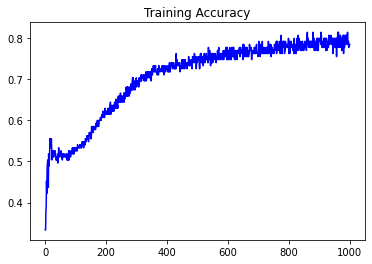

In [ ]:
np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

No handles with labels found to put in legend.


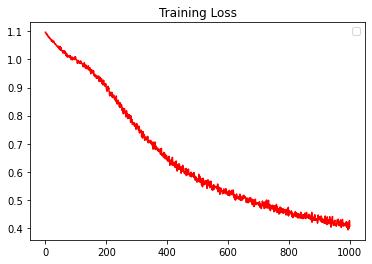

In [ ]:
%matplotlib inline
plt.plot(np_loss, color="red")
plt.title("Training Loss")
plt.legend()
plt.show()

In [ ]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.8


In [ ]:
from sklearn.metrics import classification_report
target_names = ['data_set-setosa', 'data_set-versicolor', 'data_set-virginica']
print(classification_report(Y_test, Ypred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

    data_set-setosa       1.00      1.00      1.00         7
data_set-versicolor       0.62      1.00      0.77         5
 data_set-virginica       0.00      0.00      0.00         3

           accuracy                           0.80        15
          macro avg       0.54      0.67      0.59        15
       weighted avg       0.68      0.80      0.72        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#######################################################3

Here I am increasing number of epochs to 2000 by keeping remaining(number of nodes, layers and the non-linearity) unchanged 

In [ ]:
#

X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


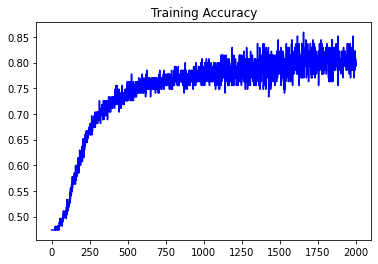

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

#import the dataset 
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

#Let's have a look at the dataset
data_set.head()

Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ### 4 predictors
        self.fc2 = nn.Linear(227, 94) ### 227 neurons in hidden layer 1, 94 in 3
        self.fc3 = nn.Linear(94, 75) ### 75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

from torch.autograd import Variable

loss1 = []
train_acc = []

Epoch = 2000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            #print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1))

np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

No handles with labels found to put in legend.


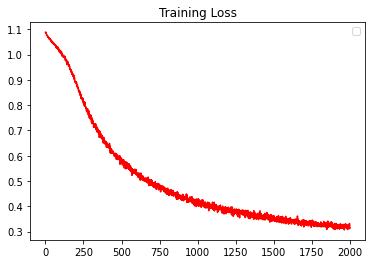

In [ ]:
%matplotlib inline
plt.plot(np_loss, color="red")
plt.title("Training Loss")
plt.legend()
plt.show()

In [ ]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.9333333333333333


I have observed that by increasing the epochs the accuracy got increased.

In [ ]:
#################################################

Now I am changing increasing learning rate.

X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


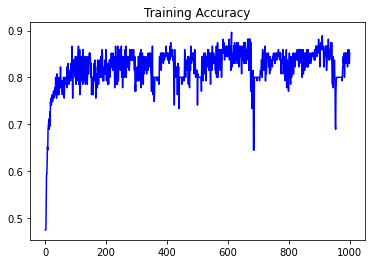

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

#import the dataset 
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

#Let's have a look at the dataset
data_set.head()

Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ### 4 predictors
        self.fc2 = nn.Linear(227, 94) ### 227 neurons in hidden layer 1, 94 in 3
        self.fc3 = nn.Linear(94, 75) ### 75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

from torch.autograd import Variable

loss1 = []
train_acc = []

Epoch = 1000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            #print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1))

np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

No handles with labels found to put in legend.


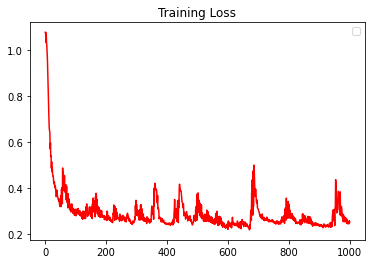

In [ ]:
%matplotlib inline
plt.plot(np_loss, color="red")
plt.title("Training Loss")
plt.legend()
plt.show()

In [ ]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.8


I have observed the accuracy got no change by increasing learning rate.




In [ ]:
###############################

I have changed activation from Relu to tanh

X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


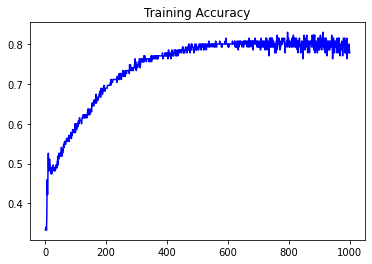

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

#import the dataset 
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

#Let's have a look at the dataset
data_set.head()

Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ### 4 predictors
        self.fc2 = nn.Linear(227, 94) ### 227 neurons in hidden layer 1, 94 in 3
        self.fc3 = nn.Linear(94, 75) ### 75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.tanh(self.fc1(x)) #activation function for 1
        x = F.tanh(self.fc2(x))
        x = self.dropout(F.tanh(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

from torch.autograd import Variable

loss1 = []
train_acc = []

Epoch = 1000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            #print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1))

np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

No handles with labels found to put in legend.


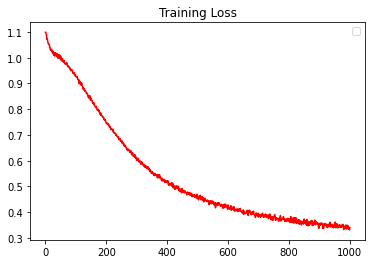

Test accuracy:  0.7333333333333333


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [ ]:
%matplotlib inline
plt.plot(np_loss, color="red")
plt.title("Training Loss")
plt.legend()
plt.show()
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

observed accuracy got decreased 

In [ ]:
####################

INCREASING HIDDEN LAYER NEURONS

X_train shape:  (135, 4)
Y_train shape:  (135,)
X_test shape:  (15, 4)
Y_test shape:  (15,)


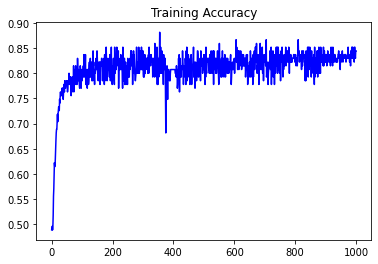

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

#import the dataset 
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

#Let's have a look at the dataset
data_set.head()

Species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
data_set.Species = [Species[item] for item in data_set.Species]

X = data_set.iloc[:, 0:4] #predictors
y = data_set.iloc[:, 4]
from sklearn.preprocessing import normalize

X = normalize(X)
y = np.array(y)
y = y.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

# for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)), 
                         batch_size=135, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)), 
                        batch_size=135, shuffle=True)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 500) ### 4 predictors
        self.fc2 = nn.Linear(500, 300) ### 500 neurons in hidden layer 1, 300 in 3
        self.fc3 = nn.Linear(300, 250) ### 250 neurons in hidden layer 3
        self.fc4 = nn.Linear(250, 3) ### 3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis=1)

from torch.autograd import Variable

loss1 = []
train_acc = []

Epoch = 1000

for epoch in range(Epoch):
    acc = 0
    
    for i, (features, labels) in enumerate(trainloader):
        features = Variable(features)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        features = features.float()
        
        outputs = model(features)
        
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
        
        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
            
            train_acc1 = acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)
            
            #print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1))

np_loss = loss1[0].numpy()

for i in range(len(loss1)):
    np_loss = np.append(np_loss, loss1[i])

np_acc = train_acc[0]

for i in range(len(train_acc)):
    np_acc = np.append(np_acc, train_acc[i])

%matplotlib inline
plt.plot(np_acc, color="blue")
plt.title("Training Accuracy")
plt.show()

In [ ]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.8666666666666667


In [ ]:
#ACCURACY GOT INCREASED TO 0.86